In [103]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
data = pd.read_csv('usdeaths.csv')

In [31]:
data.head()

,Unnamed: 0,x
0,1,9007
1,2,8106
2,3,8928
3,4,9137
4,5,10017


In [32]:
data.tail()

,Unnamed: 0,x
67,68,9827
68,69,9110
69,70,9070
70,71,8633
71,72,9240


In [39]:
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [51]:
data['date'] = pd.date_range(start= '1/1/1973', end = '1/1/1979',freq='M')

In [53]:
data.set_index('date', inplace=True)

In [54]:
data.head()

,x
date,
1973-01-31,9007
1973-02-28,8106
1973-03-31,8928
1973-04-30,9137
1973-05-31,10017


In [40]:
cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_reshaped = pd.DataFrame(data.values.reshape(-1,12), index = range(1973,1979), columns = cols)

In [41]:
data_reshaped

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8433,8160,8034
1976,7717,7461,7776,7925,8634,8945,10078,9179,8037,8488,7874,8647
1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
1978,7836,6892,7791,8129,9115,9434,10484,9827,9110,9070,8633,9240


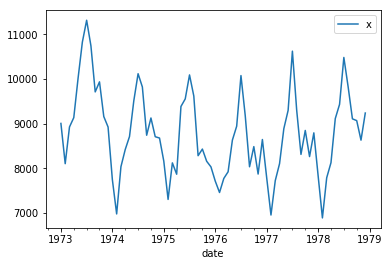

In [55]:
data.plot()

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [57]:
from sklearn.metrics import mean_squared_error

In [68]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
for i in range(1, 11):
    model = SimpleExpSmoothing(data.iloc[:60]).fit(smoothing_level=i/10, optimized=False)
    forecasted_val = np.round(model.forecast(1)[0], 2)
    print('alpha = ', i/10, '| Forecasted value: ', forecasted_val, 
          '| MSE: ', np.round(mean_squared_error(np.array(data.iloc[60]), np.array([forecasted_val])), 2))


alpha =  0.1 | Forecasted value:  8651.25 | MSE:  664632.56
alpha =  0.2 | Forecasted value:  8731.22 | MSE:  801418.85
alpha =  0.3 | Forecasted value:  8740.74 | MSE:  818554.47
alpha =  0.4 | Forecasted value:  8712.64 | MSE:  768497.69
alpha =  0.5 | Forecasted value:  8684.94 | MSE:  720699.12
alpha =  0.6 | Forecasted value:  8674.99 | MSE:  703904.22
alpha =  0.7 | Forecasted value:  8684.98 | MSE:  720767.04
alpha =  0.8 | Forecasted value:  8710.82 | MSE:  765310.03
alpha =  0.9 | Forecasted value:  8748.32 | MSE:  832327.78
alpha =  1.0 | Forecasted value:  8796.0 | MSE:  921600.0


/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so

In [71]:
model = SimpleExpSmoothing(data.iloc[:61]).fit(smoothing_level=0.1, optimized=False)


forecasted_data = np.round(model.forecast(13)).astype(int)
forecasted_data

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


1978-02-28    8570
1978-03-31    8570
1978-04-30    8570
1978-05-31    8570
1978-06-30    8570
1978-07-31    8570
1978-08-31    8570
1978-09-30    8570
1978-10-31    8570
1978-11-30    8570
1978-12-31    8570
1979-01-31    8570
1979-02-28    8570
Freq: M, dtype: int64

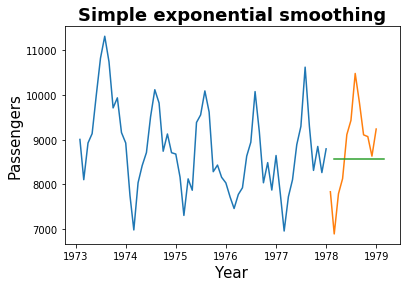

In [72]:
plt.plot(data.iloc[:60], label='Previous data')
plt.plot(data.iloc[60:], label='Actual data')
plt.plot(forecasted_data, label='Forecasted data')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Passengers', fontsize=15)
plt.title('Simple exponential smoothing', weight='bold', fontsize=18)
plt.show()

## ARIMA

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

In [74]:
x = data.values

In [85]:
size = int(len(x) * 0.9)
size

64

In [86]:
train, test = x[0:size], x[size:]


In [87]:
train.shape

(64, 1)

In [88]:
test.shape

(8, 1)

In [89]:
hist = [x for x in train]

predicted=9449.428371, expected=9115.000000
predicted=8904.039690, expected=9434.000000
predicted=9675.318254, expected=10484.000000
predicted=10429.759074, expected=9827.000000
predicted=9787.326640, expected=9110.000000
predicted=9034.124362, expected=9070.000000
predicted=9133.220511, expected=8633.000000
predicted=8497.135222, expected=9240.000000
Test MSE: 334014.001


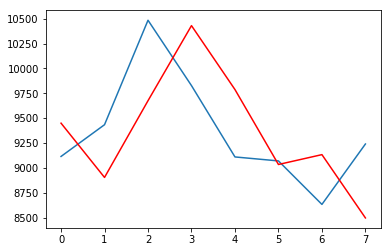

In [101]:
pred = list()
for t in range(len(test)):
    model = ARIMA(hist, order = (1,1,1))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    pred.append(yhat)
    obs = test[t]
    hist.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, pred)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(pred, color='red')
plt.show()

In [97]:
test.shape

(8, 1)

In [98]:
pred

[array([9435.14994863]),
 array([9164.68723137]),
 array([9503.20084822]),
 array([10322.96161013]),
 array([9906.25658183]),
 array([8912.25818547]),
 array([8790.43055225]),
 array([8908.44798013])]

## SARIMA

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


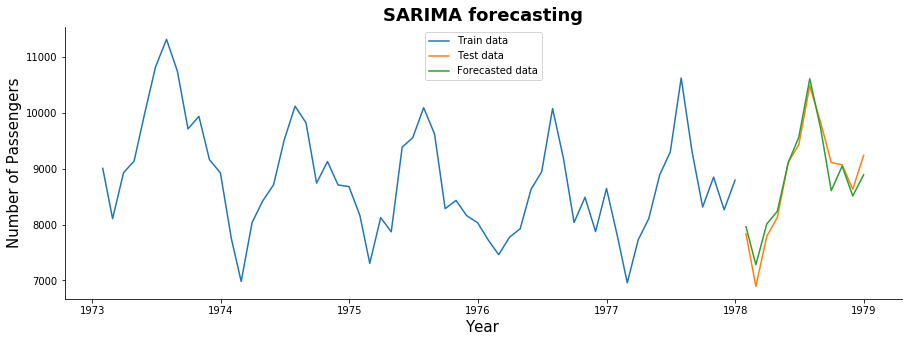

234.9021072702414

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Values to keep in training data, k
k = 60
# Model building
model = SARIMAX(np.log(data.iloc[:k]), 
                order=(2, 0, 2), 
                seasonal_order=(1, 0, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
model_fit = model.fit(disp=False)
# Visualization
plt.figure(figsize=(15, 5))
plt.plot(data.iloc[:k], label='Train data')
plt.plot(data.iloc[k:], label='Test data')
plt.plot(np.round(np.exp(model_fit.forecast(72-k))), label='Forecasted data')
plt.legend(loc='upper center')
sns.despine()
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('SARIMA forecasting', fontsize=18, weight='bold')
plt.show()


from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data.iloc[k:], np.round(np.exp(model_fit.forecast(72-k)))))


In [106]:
# Iterating over parameters
rmse = []
params = []
for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(3):
                for D in range(2):
                    for Q in range(3):            
                        try:
                            model = SARIMAX(np.log(data.iloc[:k]), 
                                            order=(p, d, q), 
                                            seasonal_order=(P, D, Q, 12), 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)                            
                            rmse.append(np.sqrt(mean_squared_error(data.iloc[k:], 
                                                np.round(np.exp(model_fit.forecast(72-k))))))
                            params.append(((p, d, q), (P, D, Q)))
                        except:
                            pass
# Storing RMSE and parameters and sorting the dataframe based on RMSE in ascending order
res = pd.DataFrame([rmse, params]).T.sort_values([0])
res.columns = ['RMSE', 'Params']
res.head(1)


/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency informati

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency informat

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pro

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an erro

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pr

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to c

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pr

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency informat

/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/Users/amit.panda03/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so

,RMSE,Params
171,234.902,"((2, 0, 2), (1, 0, 1))"
